Task 03

Develop a k-nearest neighbors (KNN) classifier for
image classification using TensorFlow/Keras.

Task Details: Build a KNN classifier to identify images
based on their pixel data using TensorFlow/Keras.

Dataset: MNIST Dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist


In [2]:
# loading the dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

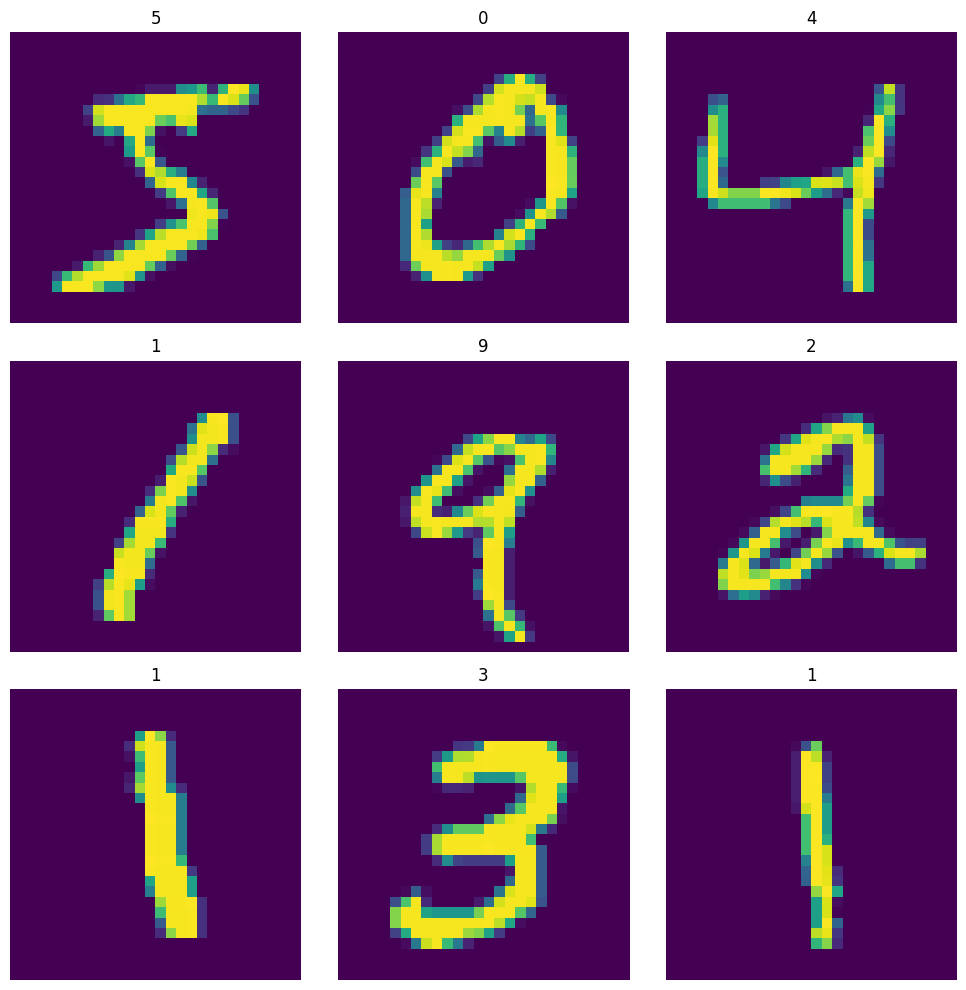

In [3]:
# visualize data
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,3,figsize=(10,10))

axes = axes.flatten()

for i in range(9):
  axes[i].imshow(x_train[i])
  axes[i].set_title(str(y_train[i]))
  axes[i].axis("off")

plt.tight_layout()
plt.show()


In [4]:
# # choose a portion of data inorder to be able to run on colab due to limited RAM

# num_samples = 50000

# x_train = x_train[:num_samples]
# y_train = y_train[:num_samples]

# x_test = x_test[:7000]
# y_test = y_test[:7000]

# x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [5]:
# Normalize the pixel value

x_train = x_train / 255.0
x_test = x_test /255.0

In [6]:
# Flatten the images for knn

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [7]:
# Implement knn

k = 3

def euclidean_distance(x,y):
  return np.sqrt(np.sum((x-y)**2, axis=1))

def knn_predict(x_train, y_train, x_test, k):
  distances = euclidean_distance(x_train, x_test)
  k_indices = distances.argsort()[:k]
  k_nearest_labels = y_train[k_indices]
  return np.bincount(k_nearest_labels).argmax()


In [8]:
import time

start = time.time()

y_pred = np.array([knn_predict(x_train, y_train, x_test, k) for x_test in x_test])

print(time.time()-start)

2969.3036856651306


In [9]:
# evaluate the classifier

accuracy = np.mean(y_pred == y_test)

print(f"accuracy :{accuracy * 100 :.2f} %")

accuracy :97.05 %
